In [1]:
import cv2
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 1

%aimport lab2
import lab2
%matplotlib inline

In [178]:
Model = np.loadtxt('./zhang_data/Model.txt')
X = Model[:, 0::2].reshape([1, -1])
Y = Model[:, 1::2].reshape([1, -1])
Z = np.zeros((1,256))
pts_model = np.vstack([X, Y, Z]).astype(np.float32)
pts_model_homo = np.concatenate([pts_model[0:2,:], np.ones([1, pts_model.shape[1]])], axis= 0)
pts_2d = []
for i in range(3):
    data = np.loadtxt('./zhang_data/data{}.txt'.format(i+1))
    img = cv2.imread('./zhang_data/CalibIm{}.tif'.format(i+1))
    x = data[:, 0::2].reshape([1, -1])
    y = data[:, 1::2].reshape([1, -1])
    pts_2d.append(np.vstack([x, y]).astype(np.float32))

In [79]:
    R_all = []
    T_all = []
    K = None
    # for i in range(len(pts_2d)):
    #     pts_src = pts_model.T
    #     pts_dst = pts_2d[i].T
    pts_src = []
    for i in range(3):
        pts_src.append(pts_model.T)

    """ YOUR CODE STARTS HERE """
    ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(pts_src, pts_2d, (640, 480), None, None)
    R_all.append(rvecs)
    T_all.append(tvecs)

In [94]:
K

array([[829.31848989,   0.        , 306.1948536 ],
       [  0.        , 829.06872477, 208.35628061],
       [  0.        ,   0.        ,   1.        ]])

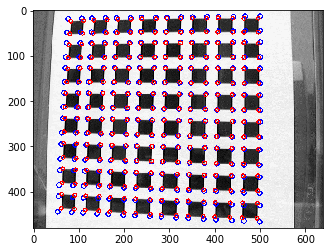

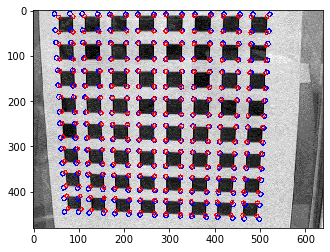

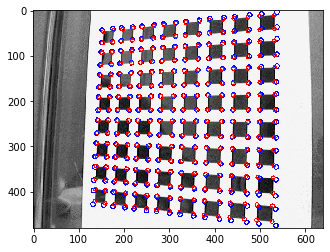

In [179]:
#R_all, T_all, K = lab2.init_param(pts_model, pts_2d)
A = np.array([K[0,0], K[0,1], K[0,2], 0, K[1,1], K[1,2], 0, 0, 1]).reshape([3, 3])
img_all = []
for i in range(len(rvecs)):
    R,_ = cv2.Rodrigues(rvecs[i])
    T = tvecs[i]
    points_2d = pts_2d[i]
    trans = np.concatenate((R[:,0:2],T),axis=1)#np.array([R[:, 0], R[:, 1], T]).T
    points_rep = np.dot(np.dot(A,trans), pts_model_homo)
    points_rep = points_rep[0:2] / points_rep[2:3]
    img = cv2.imread('./zhang_data/CalibIm{}.tif'.format(i + 1))
    for j in range(points_rep.shape[1]):
        cv2.circle(img, (np.int32(points_rep[0, j]), np.int32(points_rep[1, j])), 5, (0, 0, 255), 2)
        cv2.circle(img, (np.int32(points_2d[0, j]), np.int32(points_2d[1, j])), 4, (255, 0, 0), 2)
    plt.figure()
    plt.imshow(img)

In [171]:
    R,_ = cv2.Rodrigues(rvecs[0])
    T = tvecs[0].reshape(1,3).T
    points_2d = pts_2d[i]
    trans = np.array([R[:, 0], R[:, 1], T]).T
    points_rep = np.dot(np.dot(A,trans), pts_model_homo)
    points_rep = points_rep[0:2] / points_rep[2:3]

ValueError: could not broadcast input array from shape (3,1) into shape (3)

In [134]:
points_rep = np.dot(np.dot(A,trans), pts_model_homo)

In [175]:
tvecs[0].reshape(3,1).T

array([[-3.87366852,  3.62436244, 12.75018563]])

In [176]:
tvecs[0]

array([[-3.87366852],
       [ 3.62436244],
       [12.75018563]])